In [1]:
#Author-Vaishnavi Sabhahita
import numpy as np 
import pandas as pd 
import os
import gc 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime

In [2]:
df_promoted_content = pd.read_csv('all/promoted_content.csv')
df_promoted_content.head()

,ad_id,document_id,campaign_id,advertiser_id
0,1,6614,1,7
1,2,471467,2,7
2,3,7692,3,7
3,4,471471,2,7
4,5,471472,2,7


In [3]:
print("Number of documents:", len(df_promoted_content['document_id'].unique()))
print("Number of advertisers:", len(df_promoted_content['advertiser_id'].unique()))
print("Number of campaigns:", len(df_promoted_content['campaign_id'].unique()))

Number of documents: 185709
Number of advertisers: 4385
Number of campaigns: 34675


In [5]:
df_events = pd.read_csv('all/events.csv')
df_events.head()

/Users/vaishnavisabhahith/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,display_id,uuid,document_id,timestamp,platform,geo_location
0,1,cb8c55702adb93,379743,61,3,US>SC>519
1,2,79a85fa78311b9,1794259,81,2,US>CA>807
2,3,822932ce3d8757,1179111,182,2,US>MI>505
3,4,85281d0a49f7ac,1777797,234,2,US>WV>564
4,5,8d0daef4bf5b56,252458,338,2,SG>00


In [6]:
df_events.groupby('platform').agg({'platform':pd.Series.count})

,platform
platform,
1,8747280
2,10684579
3,3032907
1,279988
2,291699
3,83668
\N,5


In [9]:
df_events['platform'] = df_events['platform'].astype(str)

In [11]:
platform = {'1':'Desktop', '2':'Mobile', '3':'Tablet', '\\N':'Unknown'}

In [13]:
platformDf = df_events.groupby('platform').agg({'platform':pd.Series.count})

Text(0,0.5,'Frequency')

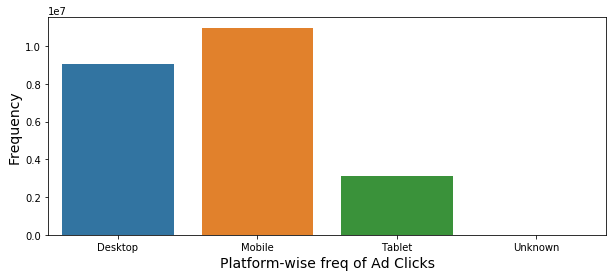

In [19]:
plt.figure(figsize=(10,4))
sns.barplot([platform[x] for x in platformDf.index], # Reformat labels
            [item for sublist in platformDf.values.tolist() for item in sublist]) # Flatten list
plt.xlabel('Platform-wise freq of Ad Clicks', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

In [8]:
print('Unique Users:', len(df_events['uuid'].unique()))
print('Unique Locations:', len(df_events['geo_location'].unique()))

Unique Users: 19794967
Unique Locations: 2989


In [20]:
try:del platformDf, platform
except: pass; gc.collect()

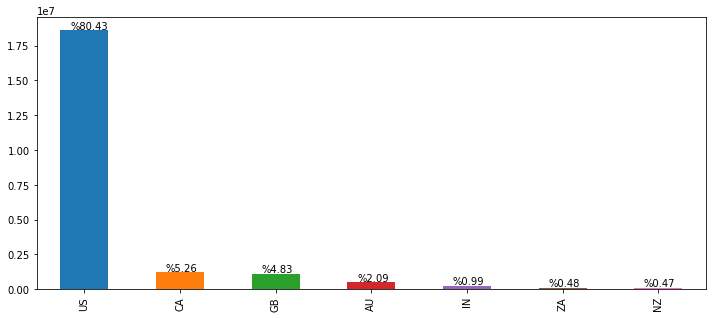

In [24]:
df_events['geo_location'] = df_events['geo_location'].apply(lambda x: str(x).split(">")[0])
location_freq = df_events['geo_location'].value_counts()
location_sum  = location_freq.sum()
location_freq = location_freq[location_freq >= 100000]

fig, (axis1) = plt.subplots(1,figsize=(12,5))
location_freq.plot(kind='bar',ax=axis1)

for p in axis1.patches:
        axis1.annotate('%{:.2f}'.format(p.get_height() * 100 / location_sum), (p.get_x()+0.1, p.get_height()+100000))